MIT License

Copyright (c) [2023] [Felicia Sequeira]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


Aim: To analyse the data collected from 10 different Hospitals in the state of Kerala, Here I cleaned the data, imputed the missing values, detected and dropped outliers and built a predictive model.

* What are the data types? (Only numeric and categorical)
- Answered

* Are there missing values?
- Yes

* What are the likely distributions of the numeric variables?
- int, float, Object

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
- Random Forest Classifier
- Support Vector Classifier
- AdaBoost Classifier

* Which independent variables have missing data? How much?
- Answered

* Do the training and test sets have the same data?
- Yes

* In the predictor variables independent of all the other predictor variables?
- No

* Which predictor variables are the most important?
- Weight, Cycle length, BMI

* Do the ranges of the predictor variables make sense?
- Yes

* What are the distributions of the predictor variables?
- Answered  

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?
- Answered
- Reduces the accuracy of the model

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.
- Answered


Cloning the GIT repository with the dataset

In [1]:
!git clone https://github.com/FeliciaSeq/PCOS_Dataset.git

Cloning into 'PCOS_Dataset'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 263.08 KiB | 5.16 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
!wget https://github.com/FeliciaSeq/PCOS_Dataset/raw/main/PCOS_data_without_infertility.xlsx.zip

--2023-10-03 01:21:12--  https://github.com/FeliciaSeq/PCOS_Dataset/raw/main/PCOS_data_without_infertility.xlsx.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FeliciaSeq/PCOS_Dataset/main/PCOS_data_without_infertility.xlsx.zip [following]
--2023-10-03 01:21:12--  https://raw.githubusercontent.com/FeliciaSeq/PCOS_Dataset/main/PCOS_data_without_infertility.xlsx.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134471 (131K) [application/zip]
Saving to: ‘PCOS_data_without_infertility.xlsx.zip’

PCOS_data_without_i 100%[===================>] 131.32K  --.-KB/s    in 0.02s   

2023-10-03 01:21:

In [3]:
!unzip PCOS_data_without_infertility.xlsx.zip

Archive:  PCOS_data_without_infertility.xlsx.zip
  inflating: PCOS_data_without_infertility.xlsx  
  inflating: __MACOSX/._PCOS_data_without_infertility.xlsx  


Importing the Data File

In [4]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('PCOS_data_without_infertility.xlsx')

# Now you can work with the DataFrame (df)


In [5]:
# Importing necessary libararies

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import io

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Importing PCOS_file
df = pd.read_excel(r"PCOS_data_without_infertility.xlsx")
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,NaN,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


Categorical data types

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl. No,541.0,271.000000,156.317519,1.000,136.000,271.000,406.000,541.000
Patient File No.,541.0,271.000000,156.317519,1.000,136.000,271.000,406.000,541.000
PCOS (Y/N),541.0,0.327172,0.469615,0.000,0.000,0.000,1.000,1.000
Age (yrs),541.0,31.430684,5.411006,20.000,28.000,31.000,35.000,48.000
Weight (Kg),541.0,59.637153,11.028287,31.000,52.000,59.000,65.000,108.000
Height(Cm),541.0,156.484835,6.033545,137.000,152.000,156.000,160.000,180.000
BMI,242.0,23.929752,3.663177,15.100,21.900,24.000,25.975,38.900
Blood Group,541.0,13.802218,1.840812,11.000,13.000,14.000,15.000,18.000
Pulse rate(bpm),541.0,73.247689,4.430285,13.000,72.000,72.000,74.000,82.000
RR (breaths/min),541.0,19.243993,1.688629,16.000,18.000,18.000,20.000,28.000


In [8]:
df.describe(include=object).T

,count,unique,top,freq
II beta-HCG(mIU/mL),541.0,203.0,1.99,307.0
Unnamed: 44,2,2,.,1


Numerical Data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     242 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [10]:
df.nunique()

Sl. No                    541
Patient File No.          541
PCOS (Y/N)                  2
 Age (yrs)                 29
Weight (Kg)               117
Height(Cm)                 50
BMI                       107
Blood Group                 8
Pulse rate(bpm)            11
RR (breaths/min)            8
Hb(g/dl)                   46
Cycle(R/I)                  3
Cycle length(days)         12
Marraige Status (Yrs)      34
Pregnant(Y/N)               2
No. of aborptions           6
  I   beta-HCG(mIU/mL)    307
II    beta-HCG(mIU/mL)    203
FSH(mIU/mL)               371
LH(mIU/mL)                342
FSH/LH                      9
Hip(inch)                  19
Waist(inch)                23
Waist:Hip Ratio             8
TSH (mIU/L)               308
AMH(ng/mL)                300
PRL(ng/mL)                481
Vit D3 (ng/mL)            331
PRG(ng/mL)                 89
RBS(mg/dl)                 55
Weight gain(Y/N)            2
hair growth(Y/N)            2
Skin darkening (Y/N)        2
Hair loss(

In [11]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

Are there missing values?



In [12]:
#checking null values
df.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                       299
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                    532
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio           532
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [13]:
def impute_missing_numeric_columns(df, columns):
    """
    Impute missing values in specified numeric columns with their means.

    Args:
    - df: pandas DataFrame
        The DataFrame containing the data.
    - columns: list of str
        List of column names to impute missing values in.

    Returns:
    - df: pandas DataFrame
        The DataFrame with missing values imputed.
    """
    for col in columns:
        if col in df.columns:
            df[col].fillna(df[col].mean(), inplace=True)
    return df

# Example usage:
columns_to_impute = ['BMI', 'FSH/LH', 'Waist:Hip Ratio']
df_mean = impute_missing_numeric_columns(df, columns_to_impute)


In [14]:
df_mean.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,23.929752,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,23.929752,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,23.929752,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,23.929752,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [15]:
def impute_missing_numeric_columns(df, columns):
    """
    Impute missing values in specified numeric columns with their means.

    Args:
    - df: pandas DataFrame
        The DataFrame containing the data.
    - columns: list of str
        List of column names to impute missing values in.

    Returns:
    - df: pandas DataFrame
        The DataFrame with missing values imputed.
    """
    for col in columns:
        if col in df.columns:
            df[col].fillna(df[col].mode(), inplace=True)
    return df

# Example usage:
columns_to_impute = ['BMI', 'FSH/LH', 'Waist:Hip Ratio']
df_mode = impute_missing_numeric_columns(df, columns_to_impute)

In [16]:
df_mode.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,23.929752,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,23.929752,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,23.929752,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,23.929752,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [17]:
def impute_missing_numeric_columns_knn(df, columns, n_neighbors=5):
    """
    Impute missing values in specified numeric columns using K-Nearest Neighbors (KNN) imputation.

    Args:
    - df: pandas DataFrame
        The DataFrame containing the data.
    - columns: list of str
        List of column names to impute missing values in.
    - n_neighbors: int, optional (default=5)
        Number of nearest neighbors to consider for KNN imputation.

    Returns:
    - df: pandas DataFrame
        The DataFrame with missing values imputed using KNN.
    """
    imputer = KNNImputer(n_neighbors=n_neighbors)
    for col in columns:
        if col in df.columns:
            df[col] = imputer.fit_transform(df[[col]])
    return df

# Example usage:
columns_to_impute_knn = ['BMI', 'FSH/LH', 'Waist:Hip Ratio']
df_KNN = impute_missing_numeric_columns_knn(df, columns_to_impute_knn, n_neighbors=5)


In [18]:
df_KNN.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,23.929752,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,23.929752,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,23.929752,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,23.929752,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [19]:
df_KNN.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [20]:
# Using df_KNN as the final dataset
df_KNN.drop(columns=['Unnamed: 44'], inplace=True)
df_KNN.drop(columns=['Sl. No'], inplace=True)
df_KNN.drop(columns=['II    beta-HCG(mIU/mL)'], inplace=True)

In [21]:
df_KNN.head()

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,0,28,44.6,152.0,19.300000,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,0,36,65.0,161.5,23.929752,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,1,33,68.8,165.0,23.929752,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,0,37,65.0,148.0,23.929752,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,0,25,52.0,161.0,23.929752,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [22]:
df_KNN['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].mode()[0], inplace=True)
df_KNN.isnull().sum()
df_KNN.fillna(0)

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,0,28,44.6,152.000,19.300000,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,0,36,65.0,161.500,23.929752,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,1,33,68.8,165.000,23.929752,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,0,37,65.0,148.000,23.929752,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,0,25,52.0,161.000,23.929752,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,0,35,50.0,164.592,18.500000,17,72,16,11.00,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,0,30,63.2,158.000,25.300000,15,72,18,10.80,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,0,36,54.0,152.000,23.400000,13,74,20,10.80,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,0,27,50.0,150.000,22.200000,15,74,20,12.00,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


EDA

In [23]:
df_KNN.head()

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,0,28,44.6,152.0,19.300000,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,0,36,65.0,161.5,23.929752,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,1,33,68.8,165.0,23.929752,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,0,37,65.0,148.0,23.929752,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,0,25,52.0,161.0,23.929752,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [24]:
# Summary statistics
df_KNN.describe()

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,0.327172,31.430684,59.637153,156.484835,23.929752,13.802218,73.247689,19.243993,11.160037,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,0.469615,5.411006,11.028287,6.033545,2.447200,1.840812,4.430285,1.688629,0.866904,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,0.000000,20.000000,31.000000,137.000000,15.100000,11.000000,13.000000,16.000000,8.500000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,0.000000,28.000000,52.000000,152.000000,23.929752,13.000000,72.000000,18.000000,10.500000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,0.000000,31.000000,59.000000,156.000000,23.929752,14.000000,72.000000,18.000000,11.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,1.000000,35.000000,65.000000,160.000000,23.929752,15.000000,74.000000,20.000000,11.700000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [25]:
# Data types
df_KNN.dtypes


Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/

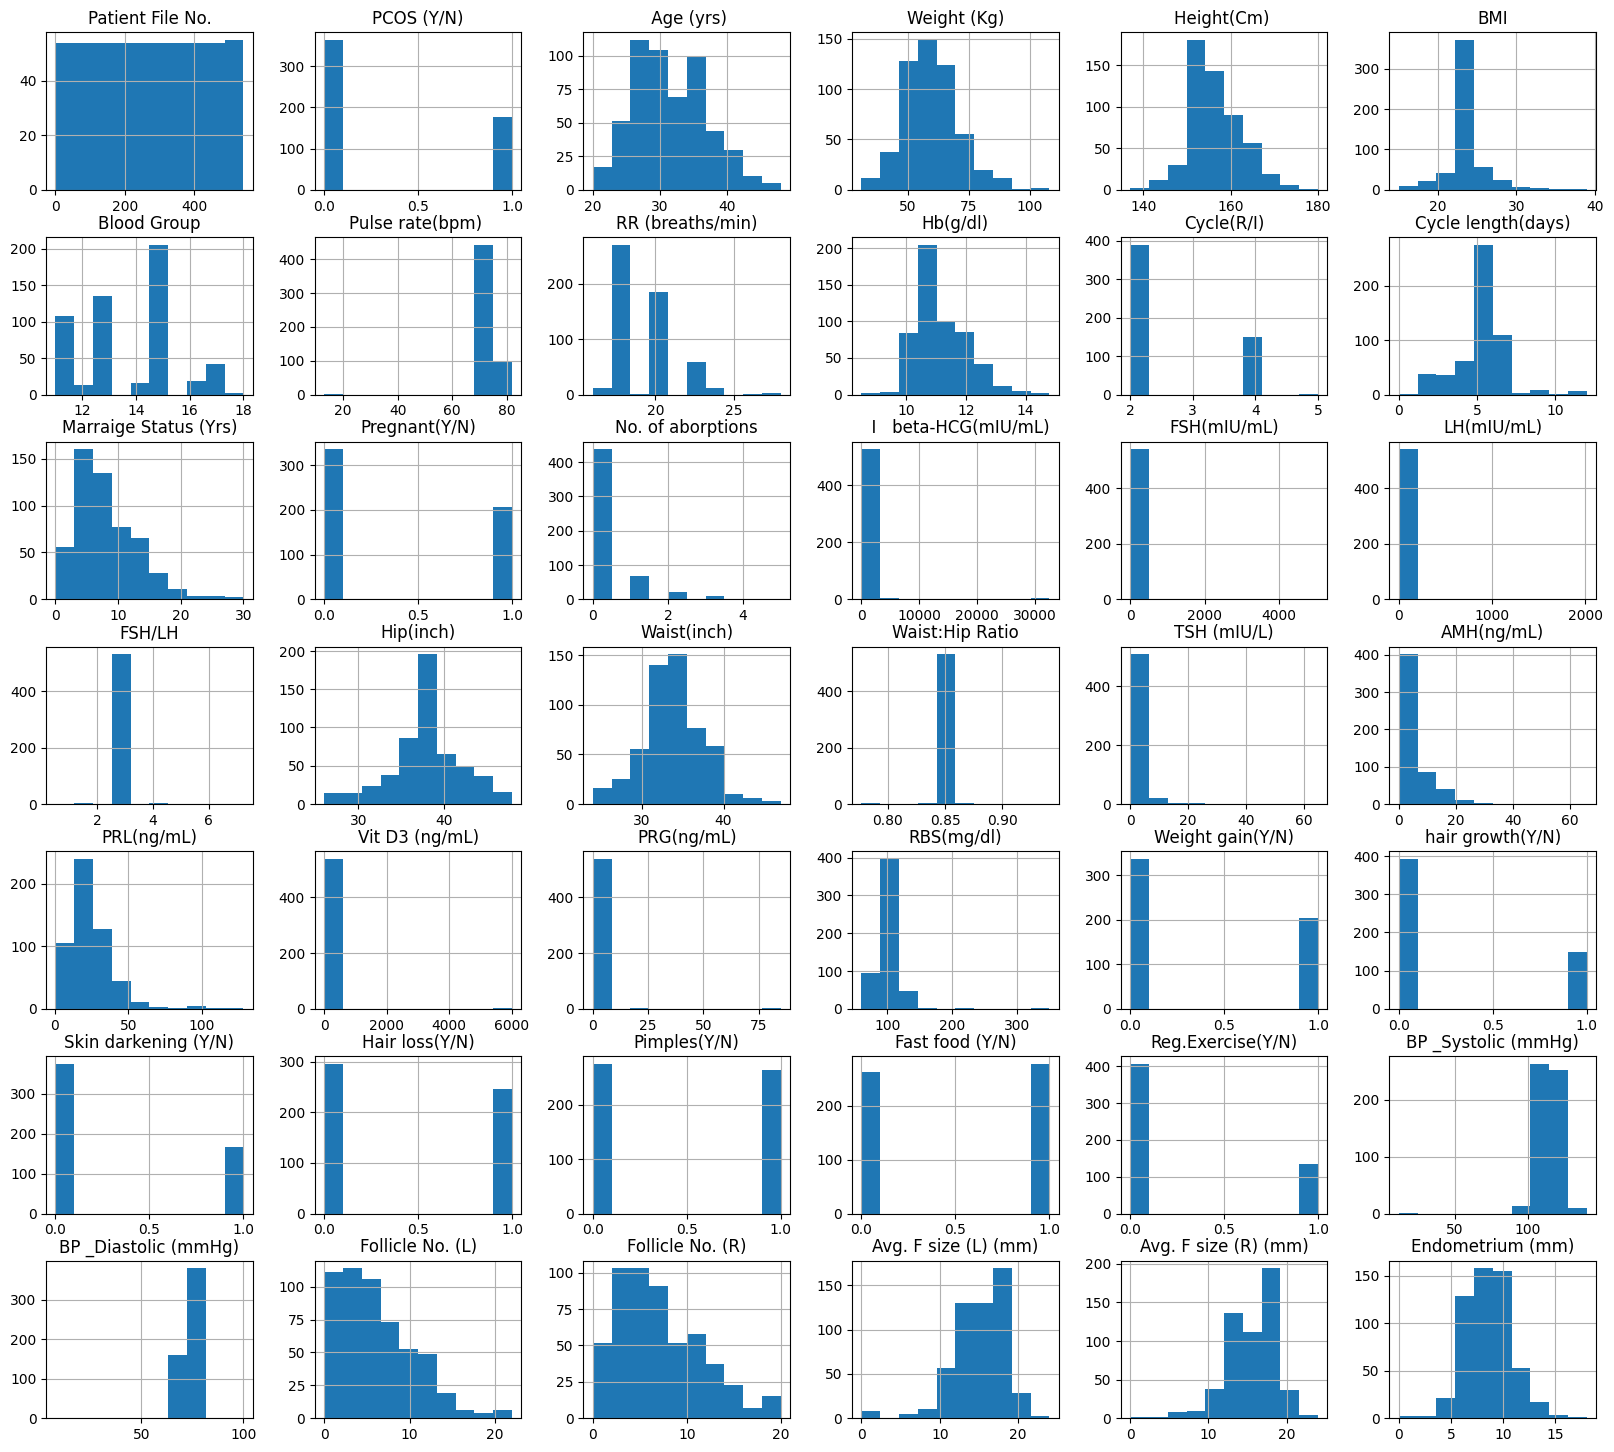

In [26]:

# Histograms for numeric variables
df_KNN.hist(figsize=(20, 18))
plt.show()


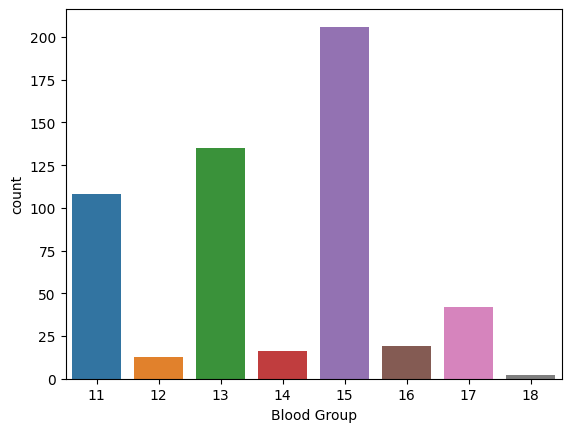

In [27]:
# Count unique values in categorical columns
df_KNN['Blood Group'].value_counts()

# Create a count plot for a categorical variable
import seaborn as sns
sns.countplot(x='Blood Group', data=df_KNN)
plt.show()


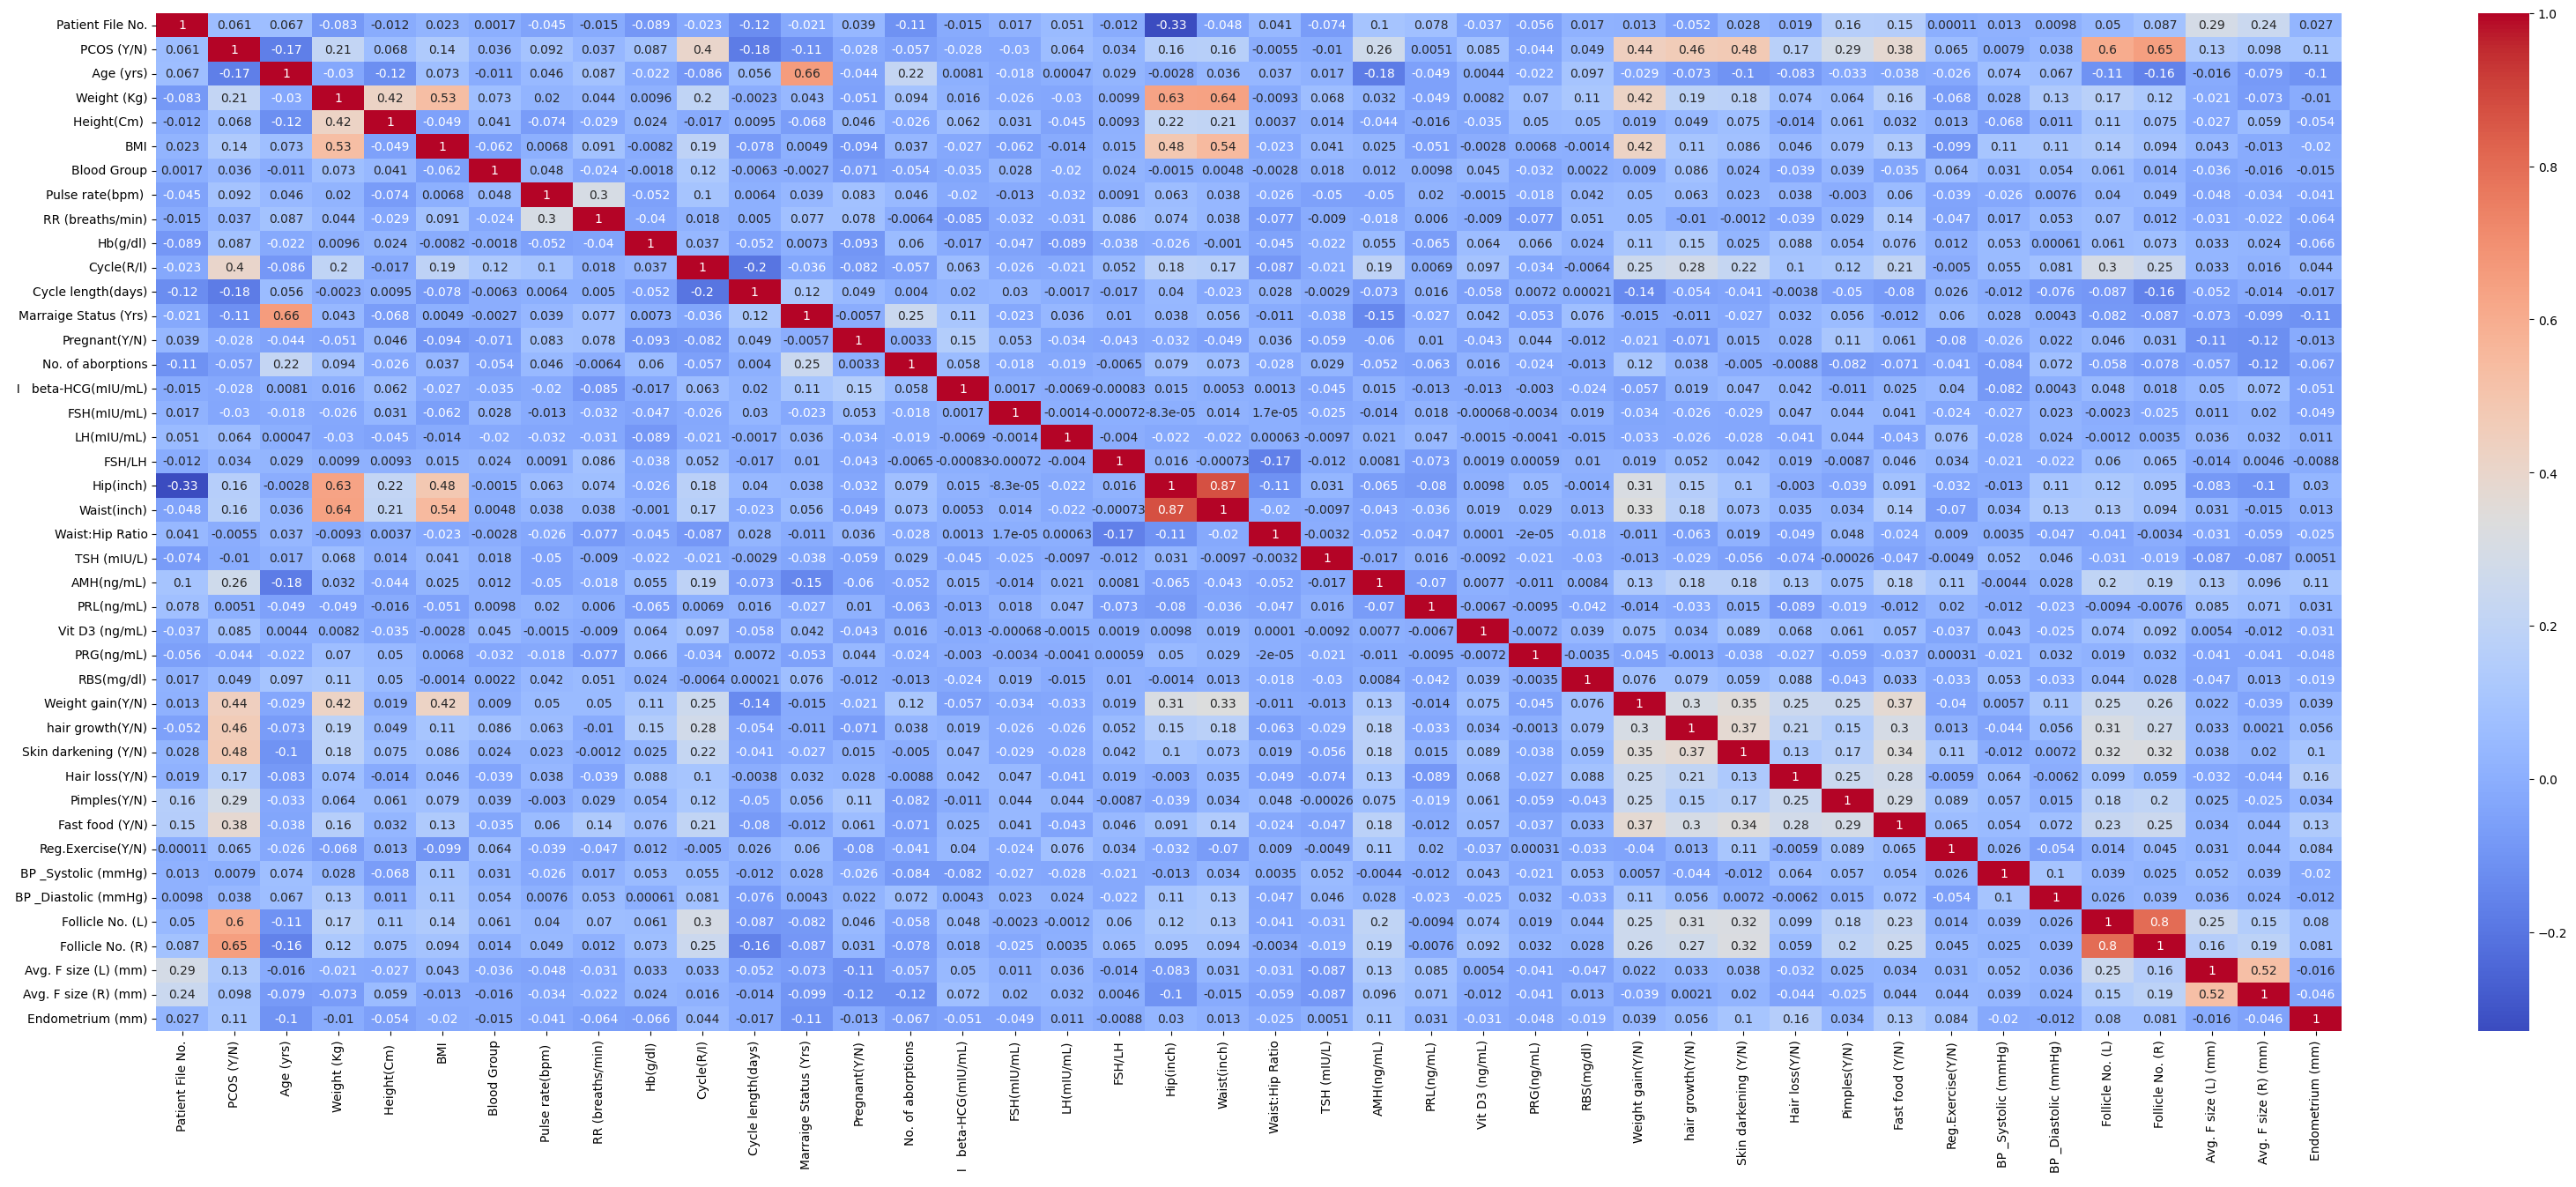

In [28]:

# Correlation matrix
corr_matrix = df_KNN.corr()

# Set the figure size
plt.figure(figsize=(40, 15))  # Adjust the width and height as needed

# Heatmap for correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


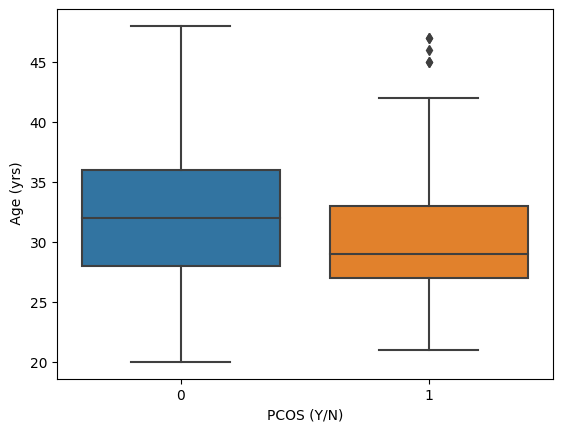

In [29]:
# Target variable distribution
df['PCOS (Y/N)'].value_counts()

# Relationship between PCOS and Age
sns.boxplot(x='PCOS (Y/N)', y=' Age (yrs)', data=df_KNN)
plt.show()

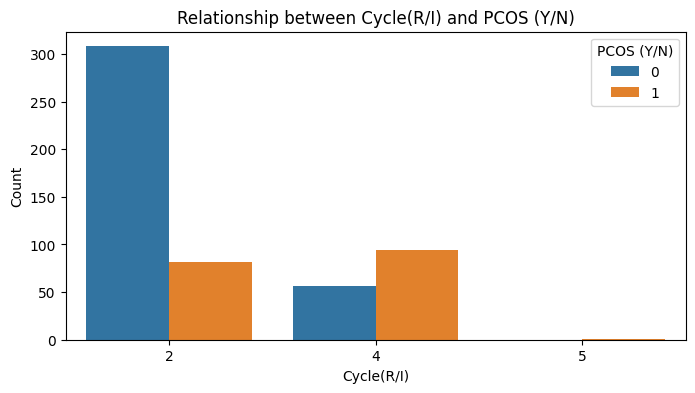

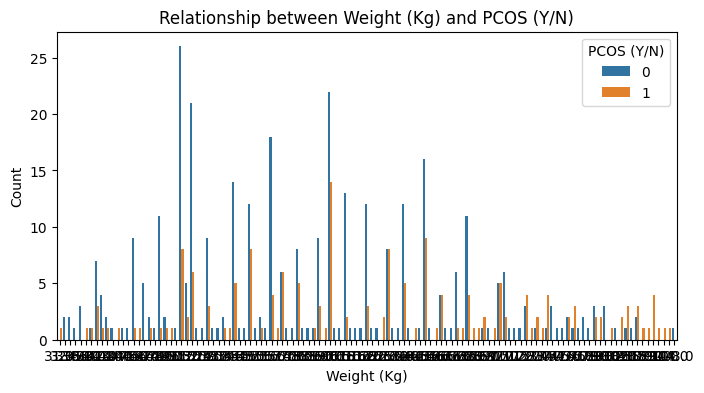

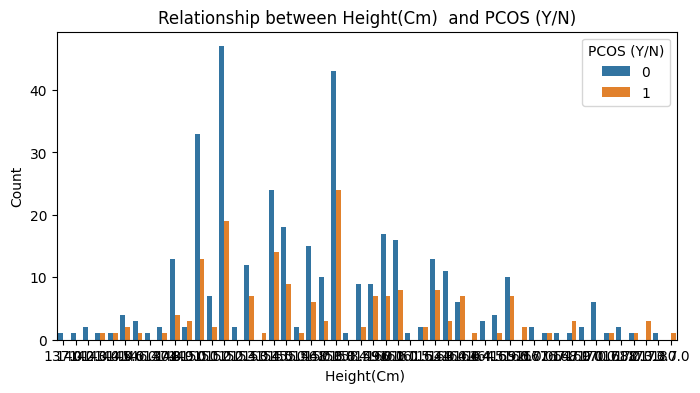

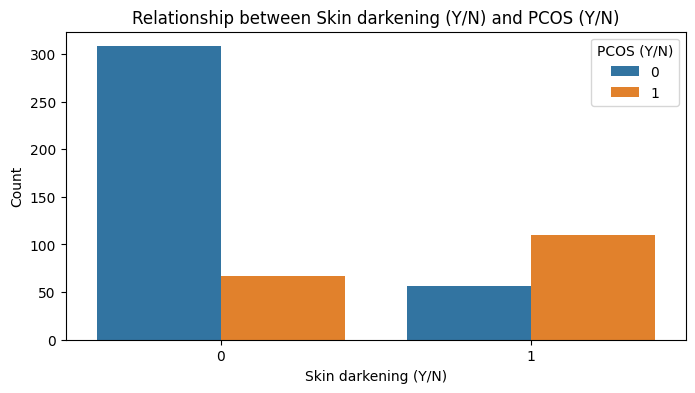

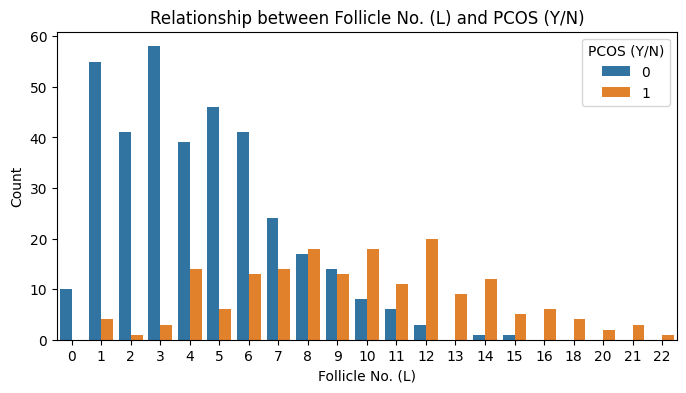

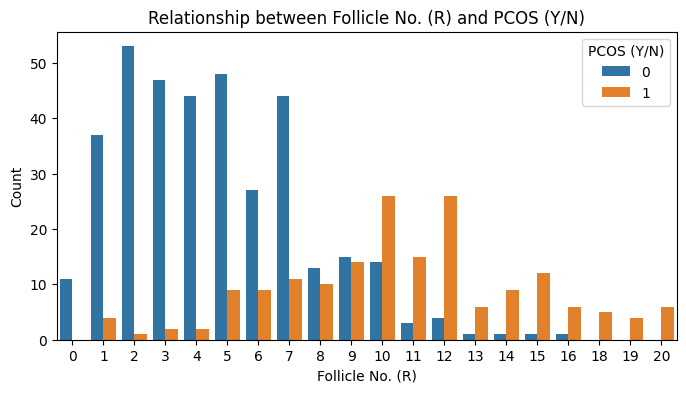

In [30]:
# Define the target variable
target_variable = 'PCOS (Y/N)'

# List of columns to visualize
columns_to_visualize = ['Cycle(R/I)', 'Weight (Kg)', 'Height(Cm) ', 'Skin darkening (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)']

# Create plots for each column
for col in columns_to_visualize:
    if col != target_variable:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue=target_variable, data=df_KNN)
        plt.title(f'Relationship between {col} and {target_variable}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title=target_variable, loc='upper right')
        plt.show()


Train test splitting

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

- Random Forest Classifier

- Support Vector Classifier

- AdaBoost Classifier



In [31]:

# Define the features (independent variables) and the target variable (dependent variable)
X = df.drop(columns=['PCOS (Y/N)'])  # Features
y = df['PCOS (Y/N)']  # Target

# Split the data into training and test sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train[X_train_cleaned.index]

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
classifier.fit(X_train_cleaned, y_train_cleaned)


RandomForestClassifier(random_state=42)

In [34]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)


Accuracy: 0.8990825688073395
Confusion Matrix:
[[75  2]
 [ 9 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        77
           1       0.92      0.72      0.81        32

    accuracy                           0.90       109
   macro avg       0.91      0.85      0.87       109
weighted avg       0.90      0.90      0.90       109



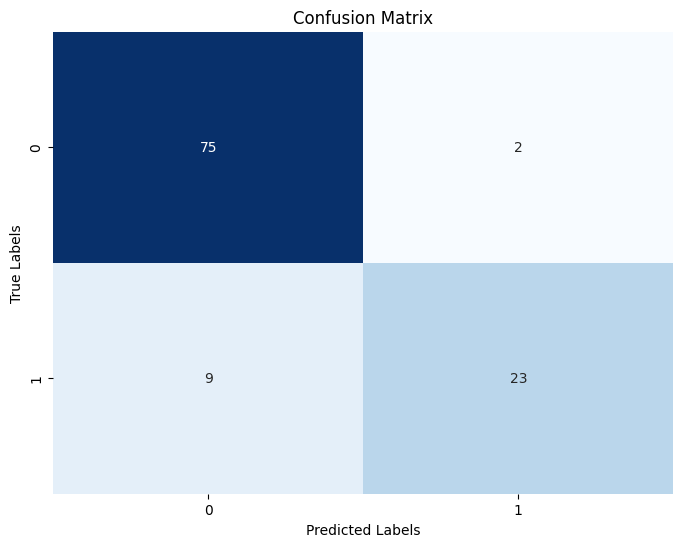

In [36]:


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


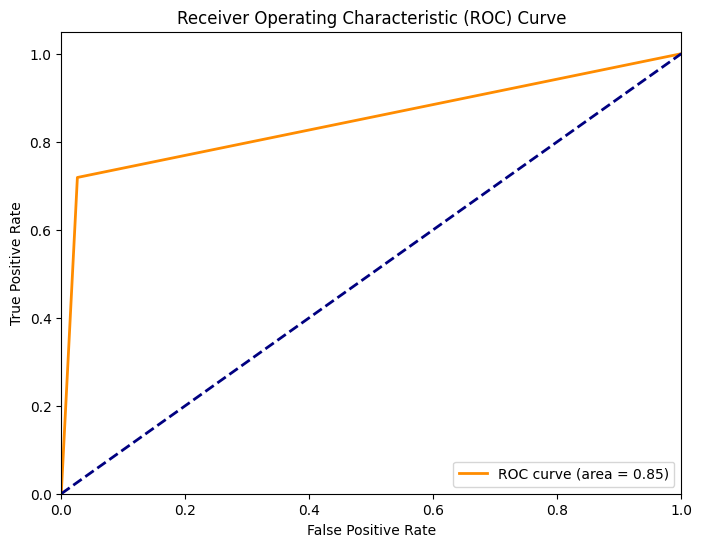

In [37]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [38]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Initialize a SimpleImputer to fill missing values with zeros
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Train your SVM classifier on the imputed training data
svm_classifier.fit(X_train_imputed, y_train)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Make predictions on the test set
svm_y_pred = svm_classifier.predict(X_test_imputed)


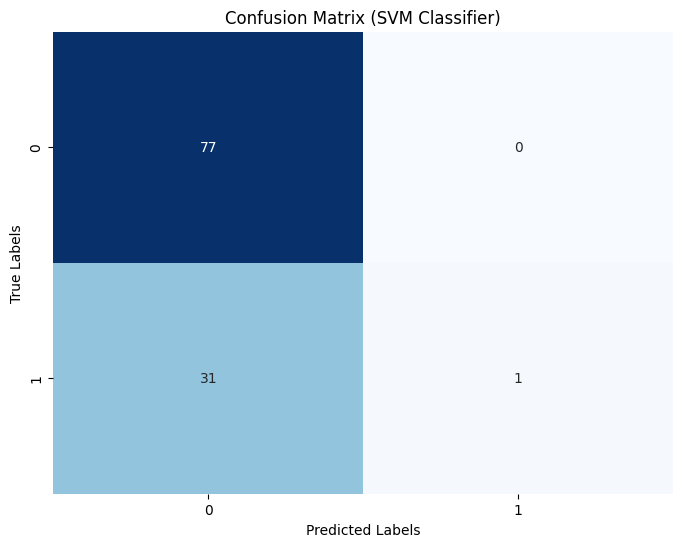

In [39]:
# Create a confusion matrix for the SVM classifier
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SVM Classifier)')
plt.show()


In [40]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on the test set
svm_accuracy = accuracy_score(y_test, svm_y_pred)

# Print the accuracy
print("Accuracy of the SVM model:", svm_accuracy)


Accuracy of the SVM model: 0.7155963302752294


In [41]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train your AdaBoost classifier on the imputed training data
adaboost_classifier.fit(X_train_imputed, y_train)

# Make predictions on the test set
adaboost_y_pred = adaboost_classifier.predict(X_test_imputed)


In [42]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on the test set
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)

# Print the accuracy
print("Accuracy of the SVM model:", adaboost_accuracy)


Accuracy of the SVM model: 0.8440366972477065


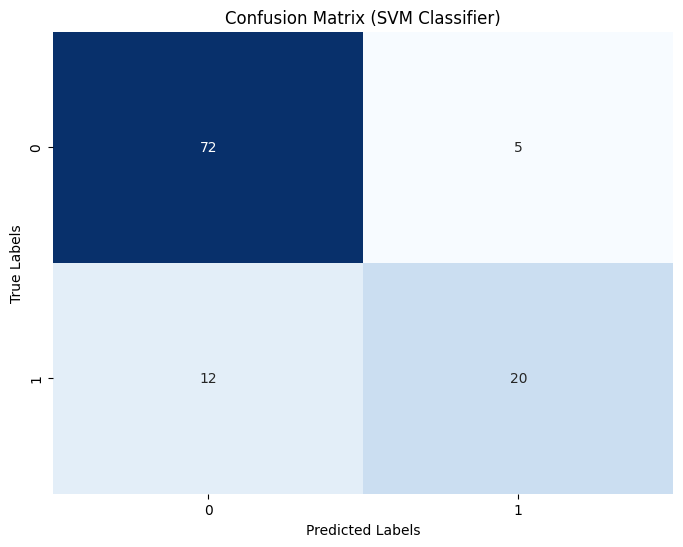

In [43]:
# Create a confusion matrix for the SVM classifier
adaboost_conf_matrix = confusion_matrix(y_test, adaboost_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(adaboost_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SVM Classifier)')
plt.show()


Remove outliers and keep outliers (does if have an effect of the final predictive model)?

- Reduces the accuracy of the model

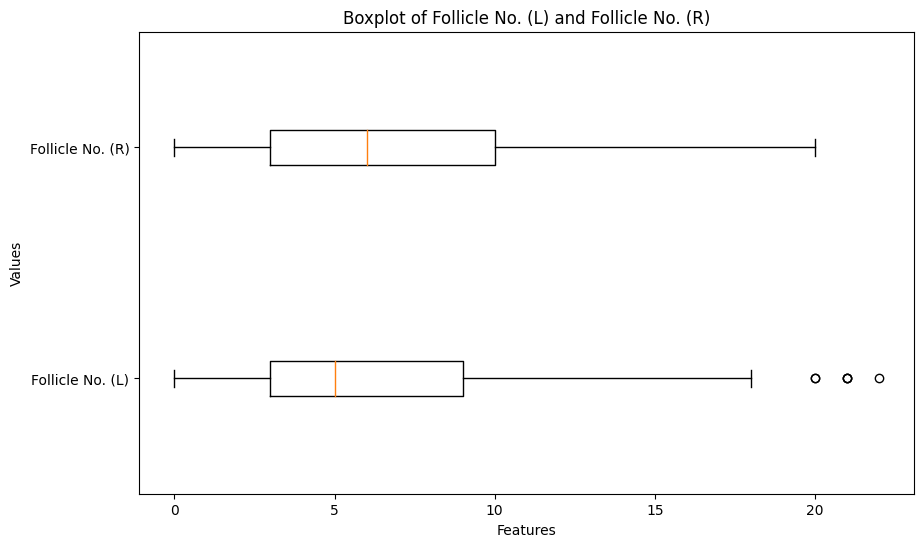

Rows with outliers:
     Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
26                 27           1          30         76.0       160.00   
50                 51           1          23         68.0       172.00   
117               118           1          28         68.0       155.00   
450               451           1          34         69.0       167.64   
464               465           1          34         54.0       153.00   
509               510           1          46         54.0       152.00   

           BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  \
26   23.929752           15                75                18      11.2   
50   23.929752           15                72                16      10.8   
117  23.929752           13                74                20      11.2   
450  24.600000           15                80                20      11.5   
464  23.100000           16                72                20      

In [44]:

features = ['Follicle No. (L)', 'Follicle No. (R)']
data = df[features]

# Calculate the IQR for each feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define a function to detect outliers based on IQR
def detect_outliers(row):
    is_outlier = (row < (Q1 - 1.5 * IQR)) | (row > (Q3 + 1.5 * IQR))
    return is_outlier

# Apply the outlier detection function to each row
outliers = data.apply(detect_outliers, axis=1)

# Visualize the outliers using a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data.values, vert=False, labels=features)
plt.title('Boxplot of Follicle No. (L) and Follicle No. (R)')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

# Show the rows with outliers
outlier_rows = df[outliers.any(axis=1)]
print("Rows with outliers:")
print(outlier_rows)


In [45]:

# List of row indices with outliers
outlier_indices = [26, 50, 117, 450, 464, 509]

# Remove the rows with outliers
df_cleaned = df_KNN.drop(outlier_indices)

# Check the shape of the cleaned dataset
print("Shape of cleaned dataset:", df_cleaned.shape)


Shape of cleaned dataset: (535, 42)


Data Imputation
Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

Removing 1%

In [46]:
df1 = df_cleaned.copy()

#removing 1% data from column
df_percent1 = df1['BMI'].sample(frac = 0.01)

#using location of fraction data to set null
df1['BMI'].loc[df1.index.isin(df_percent1.index)]=np.NaN

In [47]:
#Count of null values
df1['BMI'].isnull().sum()

5

Using mean imputation to impute null values

In [48]:
# imputing data using mean method
df1['BMI']=df1['BMI'].fillna(df1['BMI'].mean())

In [49]:
#count of null values
df1['BMI'].isnull().sum()

0

In [50]:
#viewing data after imputation
df1

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,0,28,44.6,152.000,19.300000,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,0,36,65.0,161.500,23.929752,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,1,33,68.8,165.000,23.929752,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,0,37,65.0,148.000,23.929752,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,0,25,52.0,161.000,23.929752,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,0,35,50.0,164.592,18.500000,17,72,16,11.00,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,0,30,63.2,158.000,25.300000,15,72,18,10.80,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,0,36,54.0,152.000,23.400000,13,74,20,10.80,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,0,27,50.0,150.000,22.200000,15,74,20,12.00,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [51]:
# applying label encoder
df1 = df1.apply(LabelEncoder().fit_transform)
df1

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,0,8,12,13,18,4,8,4,11,...,0,1,0,2,3,3,3,24,25,48
1,1,0,16,69,28,54,4,5,3,24,...,0,0,0,3,2,3,5,19,19,3
2,2,1,13,79,36,54,0,3,1,25,...,1,1,0,3,3,13,15,24,27,66
3,3,0,17,69,9,54,2,3,3,27,...,0,0,0,3,2,2,2,19,19,36
4,4,0,5,25,27,54,0,3,1,5,...,0,0,0,3,3,3,4,21,19,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,530,0,15,23,35,14,6,3,0,17,...,0,0,0,2,2,1,0,23,12,25
537,531,0,10,63,22,67,4,3,1,15,...,0,0,0,2,2,9,7,26,25,45
538,532,0,16,33,13,48,2,5,3,15,...,0,0,0,2,3,1,0,24,11,34
539,533,0,7,23,11,37,4,5,3,27,...,1,0,0,2,2,7,6,24,21,78


In [52]:
print(df1.columns)

Index(['Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


In [53]:
X1 = df1.drop(['Weight (Kg)'], axis =1)
y1 = df1['Weight (Kg)']

In [54]:
# splitting datset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=30)

In [55]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
LR_1 = LogisticRegression(max_iter=1000)

# Fit the model, make predictions, and print scores
MODEL_1 = LR_1.fit(X1_train, y1_train)
prediction_1 = MODEL_1.predict(X1_test)

print("training data score: {:,.3f}".format(LR_1.score(X1_train, y1_train)))
print("test data score: {:,.3f}".format(LR_1.score(X1_test, y1_test)))

training data score: 0.783
test data score: 0.043


The mean imputation has reduced the accuracy of the model

In [56]:
#installing dependencies
%pip install mlxtend --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0


In [57]:
from mlxtend.evaluate import bias_variance_decomp

In [58]:
# using 0_1 loss to find %loss, bias and variance
loss_1, bias_1, var_1 = bias_variance_decomp(MODEL_1, X1_train.values, y1_train.values, X1_test.values, y1_test.values, loss='0-1_loss', num_rounds=200, random_seed=1)
# summarize results
print('Loss: %.3f' % loss_1)
print('Bias: %.3f' % bias_1)
print('Variance: %.3f' % var_1)

Loss: 0.962
Bias: 0.957
Variance: 0.651


Removing 5% of the data

In [59]:
df5 = df_cleaned.copy()

#removing 5% data from column
df_percent5=df5.sample(frac = 0.05)

#using location of fraction data to set null
df5.loc[df5.index.isin(df_percent5.index)]=np.NaN

In [60]:
# count of null values
df5.isnull().sum()

Patient File No.          27
PCOS (Y/N)                27
 Age (yrs)                27
Weight (Kg)               27
Height(Cm)                27
BMI                       27
Blood Group               27
Pulse rate(bpm)           27
RR (breaths/min)          27
Hb(g/dl)                  27
Cycle(R/I)                27
Cycle length(days)        27
Marraige Status (Yrs)     27
Pregnant(Y/N)             27
No. of aborptions         27
  I   beta-HCG(mIU/mL)    27
FSH(mIU/mL)               27
LH(mIU/mL)                27
FSH/LH                    27
Hip(inch)                 27
Waist(inch)               27
Waist:Hip Ratio           27
TSH (mIU/L)               27
AMH(ng/mL)                27
PRL(ng/mL)                27
Vit D3 (ng/mL)            27
PRG(ng/mL)                27
RBS(mg/dl)                27
Weight gain(Y/N)          27
hair growth(Y/N)          27
Skin darkening (Y/N)      27
Hair loss(Y/N)            27
Pimples(Y/N)              27
Fast food (Y/N)           27
Reg.Exercise(Y

In [61]:
# imputing null values using median
df5=df5.fillna(df5.median())

In [62]:
df5

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1.0,0.0,28.0,44.6,152.000,19.300000,15.0,78.0,22.0,10.48,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,2.0,0.0,36.0,65.0,161.500,23.929752,15.0,74.0,20.0,11.70,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,3.0,1.0,33.0,68.8,165.000,23.929752,11.0,72.0,18.0,11.80,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,4.0,0.0,37.0,65.0,148.000,23.929752,13.0,72.0,20.0,12.00,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,5.0,0.0,25.0,52.0,161.000,23.929752,11.0,72.0,18.0,10.00,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537.0,0.0,35.0,50.0,164.592,18.500000,17.0,72.0,16.0,11.00,...,0.0,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7
537,538.0,0.0,30.0,63.2,158.000,25.300000,15.0,72.0,18.0,10.80,...,0.0,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2
538,539.0,0.0,36.0,54.0,152.000,23.400000,13.0,74.0,20.0,10.80,...,0.0,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3
539,540.0,0.0,27.0,50.0,150.000,22.200000,15.0,74.0,20.0,12.00,...,1.0,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5


In [63]:
#checking recovery after median imputation in column

df5.isnull().sum()

Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [64]:
# label encoding
df5 = df5.apply(LabelEncoder().fit_transform)
df5

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,0,8,11,13,18,4,8,4,10,...,0,1,0,2,3,3,3,24,25,48
1,1,0,16,67,29,53,4,5,3,23,...,0,0,0,3,2,3,5,19,19,3
2,2,1,13,77,37,53,0,3,1,24,...,1,1,0,3,3,13,15,24,27,66
3,3,0,17,67,9,53,2,3,3,26,...,0,0,0,3,2,2,2,19,19,36
4,4,0,5,24,28,53,0,3,1,5,...,0,0,0,3,3,3,4,21,19,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,504,0,15,22,36,14,6,3,0,16,...,0,0,0,2,2,1,0,23,12,25
537,505,0,10,61,23,67,4,3,1,14,...,0,0,0,2,2,9,7,26,25,45
538,506,0,16,31,13,48,2,5,3,14,...,0,0,0,2,3,1,0,24,11,34
539,507,0,7,22,11,37,4,5,3,26,...,1,0,0,2,2,7,6,24,21,78


In [65]:
X5 = df5.drop(['Weight (Kg)'], axis =1)
y5 = df5['Weight (Kg)']

In [66]:
# splitting data
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=30)

In [67]:
# modelling
LR_5 = LogisticRegression(max_iter=1000)

MODEL_5 = LR_5.fit(X5_train, y5_train)
prediction_5 = MODEL_5.predict(X5_test)

print("training data score: {:,.3f}".format(LR_5.score(X5_train, y5_train)))
print("test data score: {:,.3f}".format(LR_5.score(X5_test, y5_test)))

training data score: 0.829
test data score: 0.093


In [68]:
# using 0_1 loss to find %loss, bias and variance
loss_5, bias_5, var_5 = bias_variance_decomp(MODEL_5, X5_train.values, y5_train.values, X5_test.values, y5_test.values, loss='0-1_loss', num_rounds=200, random_seed=1)
# summarize results
print('Loss: %.3f' % loss_5)
print('Bias: %.3f' % bias_5)
print('Variance: %.3f' % var_5)

Loss: 0.909
Bias: 0.913
Variance: 0.602


Removing 10% of the data

In [69]:
print(df_cleaned.columns)


Index(['Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


In [70]:
df10 = df_cleaned.copy()

#removing 10% data from column
df_percent10 = df10['Cycle length(days)'].sample(frac = 0.10)

#using location of fraction data to set null
df10['Cycle length(days)'].loc[df10.index.isin(df_percent10.index)]=np.NaN

In [71]:
# null value count
df10['Cycle length(days)'].isnull().sum()

54

In [72]:
df10

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,0,28,44.6,152.000,19.300000,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,0,36,65.0,161.500,23.929752,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,1,33,68.8,165.000,23.929752,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,0,37,65.0,148.000,23.929752,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,0,25,52.0,161.000,23.929752,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,0,35,50.0,164.592,18.500000,17,72,16,11.00,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,0,30,63.2,158.000,25.300000,15,72,18,10.80,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,0,36,54.0,152.000,23.400000,13,74,20,10.80,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,0,27,50.0,150.000,22.200000,15,74,20,12.00,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


Using KNN to impute missing values

In [73]:
df10 = df10.apply(LabelEncoder().fit_transform)

In [74]:
from sklearn.impute import KNNImputer

In [75]:
# using knn imputer to treat null value
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(df10)

array([[  0.,   0.,   8., ...,  24.,  25.,  48.],
       [  1.,   0.,  16., ...,  19.,  19.,   3.],
       [  2.,   1.,  13., ...,  24.,  27.,  66.],
       ...,
       [532.,   0.,  16., ...,  24.,  11.,  34.],
       [533.,   0.,   7., ...,  24.,  21.,  78.],
       [534.,   1.,   3., ...,  26.,  25.,  28.]])

In [76]:
# null value count
df10['Cycle length(days)'].isnull().sum()

0

In [77]:
df10

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,0,8,12,13,18,4,8,4,11,...,0,1,0,2,3,3,3,24,25,48
1,1,0,16,69,28,53,4,5,3,24,...,0,0,0,3,2,3,5,19,19,3
2,2,1,13,79,36,53,0,3,1,25,...,1,1,0,3,3,13,15,24,27,66
3,3,0,17,69,9,53,2,3,3,27,...,0,0,0,3,2,2,2,19,19,36
4,4,0,5,25,27,53,0,3,1,5,...,0,0,0,3,3,3,4,21,19,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,530,0,15,23,35,14,6,3,0,17,...,0,0,0,2,2,1,0,23,12,25
537,531,0,10,63,22,67,4,3,1,15,...,0,0,0,2,2,9,7,26,25,45
538,532,0,16,33,13,48,2,5,3,15,...,0,0,0,2,3,1,0,24,11,34
539,533,0,7,23,11,37,4,5,3,27,...,1,0,0,2,2,7,6,24,21,78


In [78]:
X10 = df10.drop(['Marraige Status (Yrs)'], axis =1)
y10 = df10['Marraige Status (Yrs)']

In [79]:
# splitting data
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.3, random_state=30)

In [80]:
# modelling
LR_10 = LogisticRegression(max_iter=1000)

MODEL_10 = LR_10.fit(X10_train, y10_train)
prediction_10 = MODEL_10.predict(X10_test)

print("training data score: {:,.3f}".format(LR_10.score(X10_train, y10_train)))
print("test data score: {:,.3f}".format(LR_10.score(X10_test, y10_test)))

training data score: 0.508
test data score: 0.093


In [81]:
# using 0_1 loss to find %loss, bias and variance
loss_10, bias_10, var_10 = bias_variance_decomp(MODEL_10, X10_train.values, y10_train.values, X10_test.values, y10_test.values, loss='0-1_loss', num_rounds=200, random_seed=1)
# summarize results
print('Loss: %.3f' % loss_10)
print('Bias: %.3f' % bias_10)
print('Variance: %.3f' % var_10)

Loss: 0.914
Bias: 0.901
Variance: 0.617
